# Homework 5

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wage_raw = pd.read_csv('Wage.csv')

## 1. K-Means

1. Instead of just having an indicator for job class we add an indicator for each of the categorical variables. The categorical variables are:
* sex
* maritl
* race
* education
* region
* jobclass
* health
* health_ins

In [3]:
cat_var = ['sex', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']
wage = pd.get_dummies(wage_raw, columns=cat_var, drop_first=True)

In [102]:
wage

,year,age,logwage,wage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
0,2006,18,4.318063,75.043154,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2004,24,4.255273,70.476020,False,False,False,False,False,False,False,False,False,True,False,True,True,True
2,2003,45,4.875061,130.982177,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,2003,43,5.041393,154.685293,True,False,False,False,False,True,False,False,False,True,False,True,True,False
4,2005,50,4.318063,75.043154,False,False,True,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,5.041393,154.685293,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2996,2007,30,4.602060,99.689464,True,False,False,False,False,False,False,True,False,False,False,False,True,True
2997,2005,27,4.193125,66.229408,True,False,False,False,True,False,False,False,False,False,False,False,False,True
2998,2005,27,4.477121,87.981033,False,False,False,False,False,False,False,False,True,False,False,False,True,False


2. Code

In [5]:
rng = np.random.default_rng()
train_idx = rng.binomial(1, 0.8, size = wage.shape[0]).astype(bool)
wage_train = wage[train_idx]
wage_test = wage[~train_idx]

3. We assume that everyone has completed middle school for a minimum of 9 years of schooling. If someone is a High School Grad that counts for 4 more years. If they have some college, we assume that's an associate degree. The cases where someone drops out at 1 year or 3 years average out to 2 years (most of the time). Some college should count for 2 years. College grad counts for 4 years. Advanced degreees can be masters or phds or professional degrees. Masters usually are 2 years, and Phds are usually 5-6, but often take much longer. We assume it adds a bit more years of schooling, say 4 years on average. 

4. Code

In [104]:
# make education years column
education_years = 9 + wage['education_2. HS Grad'] * 4 + wage['education_3. Some College'] * (2 + 4) + wage['education_4. College Grad'] * (4 + 4) + wage['education_5. Advanced Degree'] * (4 + 4 + 4)

# make kmeans data_frame
wage_kmeans = pd.DataFrame({'jobclass': wage['jobclass_2. Information'], 'age': wage['age'], 'education_years': education_years, 'logwage': wage['logwage']})

# standardize
wage_kmeans[['age', 'education_years', 'logwage']] = (wage_kmeans[['age', 'education_years', 'logwage']] - wage_kmeans[['age', 'education_years', 'logwage']].mean()) / wage_kmeans[['age', 'education_years', 'logwage']].std()

# split
wage_kmeans_train = wage_kmeans[train_idx]
wage_kmeans_test = wage_kmeans[~train_idx]
wage_kmeans

,jobclass,age,education_years,logwage
0,False,-2.115215,-1.888180,-0.954767
1,True,-1.595392,0.577880,-1.133275
2,False,0.223986,-0.038635,0.628727
3,True,0.050712,0.577880,1.101591
4,True,0.657171,-0.655150,-0.954767
...,...,...,...,...
2995,False,0.137349,-0.038635,1.101591
2996,False,-1.075570,-0.655150,-0.147391
2997,False,-1.335481,-1.888180,-1.309956
2998,False,-1.335481,-0.038635,-0.502580


5. Code

In [105]:
import sklearn.cluster
num_clusters = 8
kmeans_clf = sklearn.cluster.KMeans(n_clusters = num_clusters)
kmeans_clf.fit(wage_kmeans_train)

KMeans()

6. Predict

In [106]:
kmeans_weights = np.zeros(num_clusters)
for i in range(num_clusters):
    kmeans_weights[i] = np.mean(wage_kmeans_train.iloc[kmeans_clf.labels_ == i]['jobclass'].astype(int))
print(kmeans_weights)

[0.66666667 0.50743494 0.8        0.29299363 0.46285714 0.39732143
 0.51923077 0.24096386]


7. Here is some code to investigate this:

In [107]:
print(kmeans_clf.cluster_centers_)

[[ 0.66812227  1.25038882  0.95478894  0.2731773 ]
 [ 0.50743494 -0.77362873 -0.03634307 -0.0313303 ]
 [ 0.8        -0.09379251  1.81091033  1.06612075]
 [ 0.29299363  0.09320234 -1.88818023 -0.5036751 ]
 [ 0.46285714  0.37102111 -0.43672755 -1.42916273]
 [ 0.39732143  0.92133658 -0.49138822 -0.02732775]
 [ 0.51910828  0.08602857  0.29514711  1.09067936]
 [ 0.24096386 -1.44717001 -0.62543847 -1.19975317]]


As we can see, the first coordinate of each of the cluster centers (the part corresponding to the job) is exactly the fraction we calculated prior. This makes sense since each cluster center's should just be the mean of the group, otherwise the variance would increase. 

8. Code

In [108]:
kmeans_weights = kmeans_weights > 0.5
kmeans_preds_train = np.eye(num_clusters)[kmeans_clf.predict(wage_kmeans_train)] @ kmeans_weights
kmeans_err_train = np.mean(kmeans_preds_train != wage_kmeans_train['jobclass'])
print(f"The training error for the k-means classifier is {kmeans_err_train}")

The training error for the k-means classifier is 0.3831578947368421


9. Code

In [109]:
kmeans_preds_test = np.eye(num_clusters)[kmeans_clf.predict(wage_kmeans_test)] @ kmeans_weights

10. Code

In [110]:
kmeans_err_test = np.mean(kmeans_preds_test != wage_kmeans_test['jobclass'])
print(f"The test error for the k-means classifier is {kmeans_err_test}")

The test error for the k-means classifier is 0.384


## 2. Neural Networks

1. Code

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torch.utils.data as data

In [9]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_relu_logit_stack = nn.Sequential(
            nn.Linear(3, 16), 
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_relu_logit_stack(x)

In [114]:
model = Net().to(device)
print(model)

Net(
  (linear_relu_logit_stack): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [115]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=10e-4)

In [11]:
wage_nn_train = torch.tensor(wage_kmeans_train[['age', 'education_years', 'logwage']].values, dtype=torch.float32).to(device)
jobclass_nn_train = torch.tensor(wage_kmeans_train['jobclass'].values, dtype=torch.float32).to(device)
jobclass_nn_train = jobclass_nn_train.view(-1, 1)
wage_nn_test = torch.tensor(wage_kmeans_test[['age', 'education_years', 'logwage']].values, dtype=torch.float32).to(device)
jobclass_nn_test = torch.tensor(wage_kmeans_test['jobclass'].values, dtype=torch.float32).to(device)
jobclass_nn_test = jobclass_nn_test.view(-1, 1)

NameError: name 'wage_kmeans_train' is not defined

In [5]:
def train(X,y, batch_size, model, loss_fn, optimizer):
    model.train()
    for i in np.random.permutation(range(len(X)//batch_size)):
        Xi, yi = X[i*batch_size: (i+1)*batch_size], y[i*batch_size: (i+1)*batch_size]
        Xi, yi = Xi.to(device), yi.to(device)
        # pred
        pred = model(Xi)
        loss = loss_fn(pred, yi)
        # backprop
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # if i % 100 == 0:
        #     loss = loss.item()
        #     print(f"loss: {loss:>7f} [{i:>5d}/{len(X)}]")

In [6]:
def test(X, y, model, loss_fn):
    model.eval()
    size = len(X)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for Xi, yi in zip(X, y):
            Xi, yi = Xi.to(device), yi.to(device)
            pred = model(Xi)
            loss = loss_fn(pred, yi)
            test_loss += loss.item()
            correct += (pred.round() == yi).type(torch.float).item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [6]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(wage_nn_train, jobclass_nn_train, model, loss_fn, optimizer)
    test(wage_nn_train, jobclass_nn_train, model, loss_fn)

Epoch 1
-------------------------------


NameError: name 'train' is not defined

2. Code

In [121]:
model.eval()
wage_nn_train_err = ((model(wage_nn_train) > 0.5) == jobclass_nn_train).sum().item()/len(jobclass_nn_train)
print(f"The training error for the neural network is {1 - wage_nn_train_err}")

The training error for the neural network is 0.3701052631578947


3. Code

In [122]:
model.eval()
wage_nn_test_err = ((model(wage_nn_test) > 0.5) == jobclass_nn_test).sum().item()/len(jobclass_nn_test)
print(f"The test error for the neural network is {1 - wage_nn_test_err}")

The test error for the neural network is 0.35840000000000005


## 3. Regression Trees

1. Code

In [123]:
wage_dt_train = wage_kmeans_train[['age', 'education_years', 'logwage']]
jobclass_dt_train = wage_kmeans_train['jobclass']
wage_dt_test = wage_kmeans_test[['age', 'education_years', 'logwage']]
jobclass_dt_test = wage_kmeans_test['jobclass']

In [124]:
import sklearn.tree
dt_clf = sklearn.tree.DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(wage_dt_train, jobclass_dt_train)

DecisionTreeClassifier(max_depth=3)

2. Code

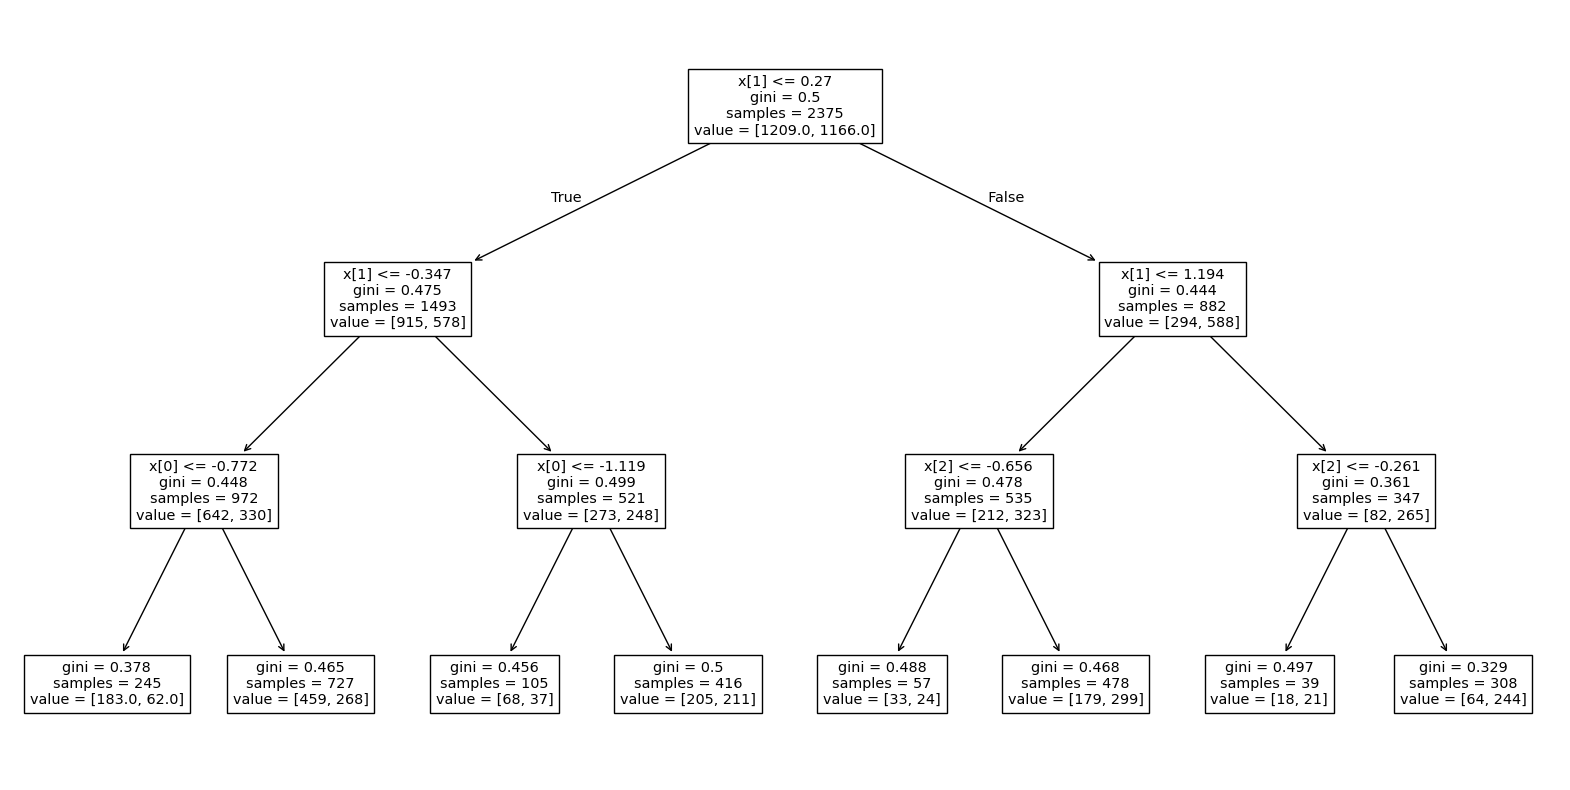

In [125]:
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(dt_clf)
plt.show()

3. Code

In [126]:
wage_dt_train_err = 1 - dt_clf.score(wage_dt_train, jobclass_dt_train)
print(f"The training error for the decision tree is {wage_dt_train_err}")

The training error for the decision tree is 0.36084210526315785


4. Code

In [127]:
wage_dt_test_err = 1 - dt_clf.score(wage_dt_test, jobclass_dt_test)
print(f"The test error for the decision tree is {wage_dt_test_err}")

The test error for the decision tree is 0.36639999999999995


5. Code

In [128]:
wage_dt = wage_kmeans[['age', 'education_years', 'logwage']]
jobclass_dt = wage_kmeans['jobclass']
dt_full_clf = sklearn.tree.DecisionTreeClassifier(max_depth = 3)
dt_full_clf.fit(wage_dt, jobclass_dt)

DecisionTreeClassifier(max_depth=3)

6. Code

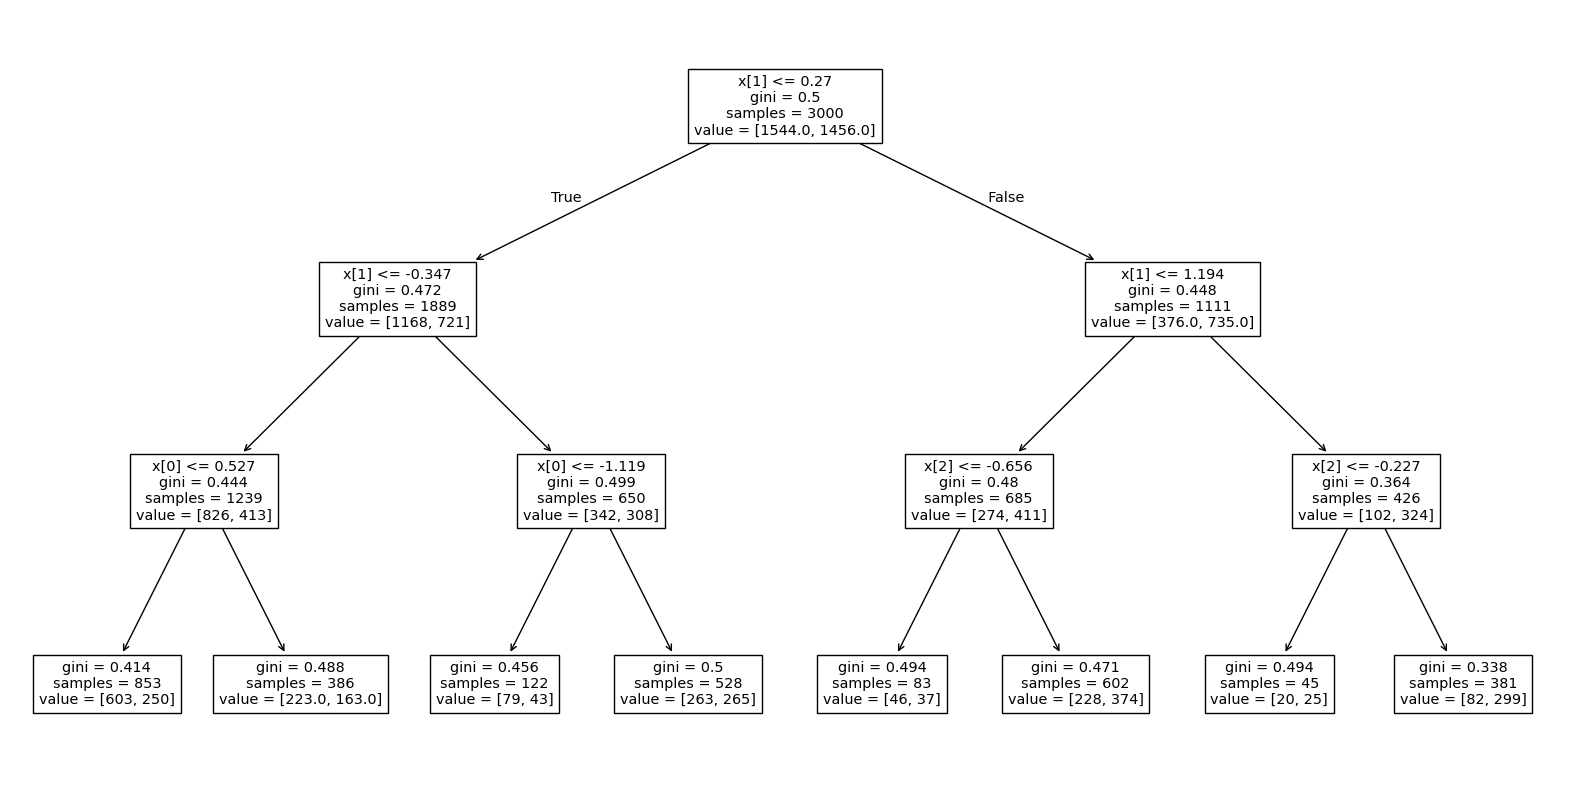

In [129]:
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(dt_full_clf)
plt.show()

7. Code

In [130]:
wage_dt_full_train_err = 1 - dt_full_clf.score(wage_dt, jobclass_dt)
print(f"The error on the training set for the decision tree is {wage_dt_full_train_err}")

The error on the training set for the decision tree is 0.362


8. Code

In [131]:
wage_dt_full_test_err = 1 - dt_full_clf.score(wage_dt_test, jobclass_dt_test)
print(f"The error on the test set for the decision tree is {wage_dt_full_test_err}")

The error on the test set for the decision tree is 0.36639999999999995


## 4. Compare All Methods

1. Code

In [133]:
results = pd.DataFrame({
    'kmeans': [kmeans_err_train, kmeans_err_test],
    'neural_network': [1 - wage_nn_train_err, 1 - wage_nn_test_err],
    'decision_tree': [wage_dt_train_err, wage_dt_test_err],
    'decision_tree_full': [wage_dt_full_train_err, wage_dt_full_test_err]
}, index = ['train', 'test'])
results

,kmeans,neural_network,decision_tree,decision_tree_full
train,0.383158,0.370105,0.360842,0.3620
test,0.384000,0.358400,0.366400,0.3664


2. All of the methods performed incredibly close to each other. They were all within 3e-2 of each other. The neural network did the best, which was expected, but all methods performed well. In theory, we should have expected the full decision tree to perform better than the standard decision tree, however, we only had 3 features, with max depth of 8, so the decision tree was quite constrained. The neural network performed the best, but not by as well as I expected. I chalk this up to there not being enough data and not using enough features. 

3. (Optional) We are going to train a neural net with one more hidden layer and more intermediary nodes. We are also going to cross validate for the learning rate in the SGD optimizer and we are going to use the entire data set with the one-hot encoding.

In [ ]:
wage = wage.astype('float64')
wage_train = wage_train.astype('float64')
wage_test = wage_test.astype('float64')
wage

In [137]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_relu_logit_stack = nn.Sequential(
            nn.Linear(17, 32), 
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_relu_logit_stack(x)
model = Net().to(device)
print(model)

Net(
  (linear_relu_logit_stack): Sequential(
    (0): Linear(in_features=17, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [22]:
wage_nn_train = torch.tensor(wage_train.drop(columns = 'jobclass_2. Information').values, dtype=torch.float32)
jobclass_nn_train = torch.tensor(wage_train['jobclass_2. Information'].values, dtype=torch.float32)
jobclass_nn_train = jobclass_nn_train.view(-1, 1)
wage_nn_test = torch.tensor(wage_test.drop(columns = 'jobclass_2. Information').values, dtype=torch.float32)
jobclass_nn_test = torch.tensor(wage_test['jobclass_2. Information'].values, dtype=torch.float32)
jobclass_nn_test = jobclass_nn_test.view(-1, 1)

In [151]:
optimizer = optim.Adam(model.parameters(), lr=10e-5)
epochs = 25

In [152]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(wage_nn_train, jobclass_nn_train, model, loss_fn, optimizer)
    test(wage_nn_train, jobclass_nn_train, model, loss_fn)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 57.2%, Avg loss: 0.677338 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 57.1%, Avg loss: 0.673603 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 59.4%, Avg loss: 0.667718 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 57.2%, Avg loss: 0.672373 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 59.5%, Avg loss: 0.668015 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 56.8%, Avg loss: 0.676829 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 59.7%, Avg loss: 0.668202 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 57.7%, Avg loss: 0.668597 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 57.5%, Avg loss: 0.670710 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 59.6%, Avg loss: 0.667262 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 57.4%, Avg los

In [153]:
model.eval()
wage_nn_train_err = ((model(wage_nn_train) > 0.5) == jobclass_nn_train).sum().item()/len(jobclass_nn_train)
print(f"The training error for the neural network is {1 - wage_nn_train_err}")
wage_nn_test_err = ((model(wage_nn_test) > 0.5) == jobclass_nn_test).sum().item()/len(jobclass_nn_test)
print(f"The test error for the neural network is {1 - wage_nn_test_err}")

The training error for the neural network is 0.43200000000000005
The test error for the neural network is 0.40480000000000005


It's clear that our nn is suffering. We will drop wages because they are codependent with logwages. We also demean year and age, since only the relative age and years matter

In [7]:
cat_var = ['sex', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']
wage = pd.get_dummies(wage_raw, columns=cat_var, drop_first=True)
wage = wage.astype('float64')
wage = wage.drop(columns = 'wage')
wage['year'] = wage['year'] - wage['year'].mean()
wage['age'] = wage['age'] - wage['age'].mean()
rng = np.random.default_rng()
train_idx = rng.binomial(1, 0.8, size = wage.shape[0]).astype(bool)
wage_train = wage[train_idx]
wage_test = wage[~train_idx]
wage

,year,age,logwage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
0,0.209,-24.414667,4.318063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.791,-18.414667,4.255273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,-2.791,2.585333,4.875061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-2.791,0.585333,5.041393,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-0.791,7.585333,4.318063,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2.209,1.585333,5.041393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2996,1.209,-12.414667,4.602060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2997,-0.791,-15.414667,4.193125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2998,-0.791,-15.414667,4.477121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print(f'Using device: {device}')
wage_nn_train = torch.tensor(wage_train.drop(columns = 'jobclass_2. Information').values, dtype=torch.float32)
jobclass_nn_train = torch.tensor(wage_train['jobclass_2. Information'].values, dtype=torch.float32)
jobclass_nn_train = jobclass_nn_train.view(-1, 1)
wage_nn_test = torch.tensor(wage_test.drop(columns = 'jobclass_2. Information').values, dtype=torch.float32)
jobclass_nn_test = torch.tensor(wage_test['jobclass_2. Information'].values, dtype=torch.float32)
jobclass_nn_test = jobclass_nn_test.view(-1, 1)

Using device: cuda


In [10]:
wage_nn_train.shape

torch.Size([2411, 16])

In [24]:
class Net(nn.Module):
    def __init__(self, d_in = 17):
        super(Net, self).__init__()
        self.linear_relu_logit_stack = nn.Sequential(
            nn.Linear(d_in, 32), 
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_relu_logit_stack(x)

In [52]:
loss_fn = nn.BCELoss()
# epochs = 25
batch_size = 32 
model = Net(d_in = 16).to(device)
optimizer = optim.Adam(model.parameters(), lr=10e-4)

In [53]:
t = 0
accuracy = 0
accuracies = [0.5]
test_accuracies = [0.5]
while max(test_accuracies) < 0.6615384615384615:
    print(f"Epoch {t+1}\n-------------------------------")
    train(wage_nn_train, jobclass_nn_train, batch_size, model, loss_fn, optimizer)
    accuracy, loss = test(wage_nn_train, jobclass_nn_train, model, loss_fn)
    test_accuracy, test_loss = test(wage_nn_test, jobclass_nn_test, model, loss_fn)
    accuracies.append(accuracy)
    test_accuracies.append(test_accuracy)
    t += 1

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 54.0%, Avg loss: 0.688912 

Test Error: 
 Accuracy: 51.5%, Avg loss: 0.692923 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 54.2%, Avg loss: 0.681890 

Test Error: 
 Accuracy: 55.4%, Avg loss: 0.680201 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 62.3%, Avg loss: 0.655133 

Test Error: 
 Accuracy: 60.3%, Avg loss: 0.660713 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 63.3%, Avg loss: 0.647987 

Test Error: 
 Accuracy: 62.4%, Avg loss: 0.647018 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 63.9%, Avg loss: 0.641303 

Test Error: 
 Accuracy: 63.4%, Avg loss: 0.637046 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 63.6%, Avg loss: 0.638212 

Test Error: 
 Accuracy: 63.1%, Avg loss: 0.633663 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 64.1%, Avg loss: 0.638521 

Test Error: 
 Accuracy: 63.4%, Avg loss: 0.6

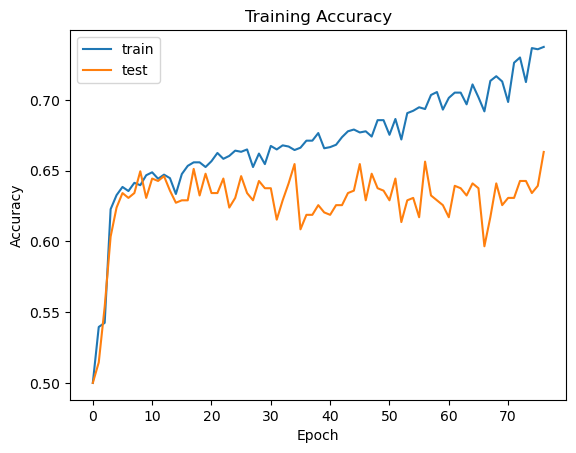

76
0.6632478632478632


In [54]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
plt.figure()
plt.plot(accuracies, label = 'train')
plt.plot(test_accuracies, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()
print(np.argmax(test_accuracies))
print(np.max(test_accuracies))

In [60]:
wage_nn_train = wage_nn_train.to(device)
jobclass_nn_train = jobclass_nn_train.to(device)
wage_nn_test = wage_nn_test.to(device)
jobclass_nn_test = jobclass_nn_test.to(device)
wage_nn_train_err = ((model(wage_nn_train.to(device)) > 0.5) == jobclass_nn_train).sum().item()/len(jobclass_nn_train)
print(f"The training error for the neural network is {1 - wage_nn_train_err}")
wage_nn_test_err = ((model(wage_nn_test) > 0.5) == jobclass_nn_test).sum().item()/len(jobclass_nn_test)
print(f"The test error for the neural network is {1 - wage_nn_test_err}")

The training error for the neural network is 0.26252587991718423
The test error for the neural network is 0.3367521367521368


This test error beats our other test error by 3%!